In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


In [2]:
import pandas as pd

data = pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv', low_memory=False)

data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# Deleting Redundant Columns

In [5]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
columns_to_keep = ['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review']
columns_to_drop = ['reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'id']

In [7]:
len(columns_to_keep)

19

In [8]:
len(columns_to_drop)

7

## Filtering Data

In [9]:
df = data[columns_to_keep]

In [10]:
df

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN
102595,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015
102596,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN
102597,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015


## Dropping Columns

In [11]:
data.drop(columns = columns_to_drop, inplace = True)

In [12]:
data.shape

(102599, 19)

# Renaming NAME column

In [13]:
data.columns

Index(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review'],
      dtype='object')

In [14]:
data.rename(columns={"NAME": "Name"}, inplace = True)

In [15]:
data.columns

Index(['Name', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review'],
      dtype='object')

# Dropping duplicates

In [16]:
data.duplicated().sum() #541 rows duplicated

np.int64(541)

In [17]:
data = data.drop_duplicates()

In [18]:
data.duplicated().sum()

np.int64(0)

# Remove the NaN values from the dataset

In [19]:
data.isna().sum() ## 15832 NaN, so drop last review

Name                        250
host id                       0
host_identity_verified      289
host name                   404
neighbourhood group          29
neighbourhood                16
lat                           8
long                          8
country                     532
country code                131
instant_bookable            105
cancellation_policy          76
room type                     0
Construction year           214
price                       247
service fee                 273
minimum nights              400
number of reviews           183
last review               15832
dtype: int64

In [20]:
data=data.drop(columns=["last review"])

In [21]:
data.isna().sum()

Name                      250
host id                     0
host_identity_verified    289
host name                 404
neighbourhood group        29
neighbourhood              16
lat                         8
long                        8
country                   532
country code              131
instant_bookable          105
cancellation_policy        76
room type                   0
Construction year         214
price                     247
service fee               273
minimum nights            400
number of reviews         183
dtype: int64

In [22]:
data.dropna(inplace = True)

In [23]:
data.isna().sum()

Name                      0
host id                   0
host_identity_verified    0
host name                 0
neighbourhood group       0
neighbourhood             0
lat                       0
long                      0
country                   0
country code              0
instant_bookable          0
cancellation_policy       0
room type                 0
Construction year         0
price                     0
service fee               0
minimum nights            0
number of reviews         0
dtype: int64

# Clean individual columns

In [24]:
data["host_identity_verified"] = data["host_identity_verified"].str.upper() # uppercase

In [25]:
data["instant_bookable"] = data["instant_bookable"].apply(lambda x: 1 if x== True else 0) # make booleans 0 and 1

In [26]:
data.reset_index(inplace = True)

In [27]:
data

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,$966,$193,10.0,9.0
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0
3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0
4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,$822,$164,1.0,9.0
99338,102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,$455,$91,4.0,36.0
99339,102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,"$1,078",$216,1.0,58.0
99340,102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,$103,$21,7.0,40.0


In [28]:
type(data["instant_bookable"][15])

numpy.int64

# Checking for any other changes needed

## Changing data type

In [29]:
type(data["price"][15])

str

In [30]:
data["price"].head(3)

0    $966 
1    $142 
2    $204 
Name: price, dtype: object

In [31]:
data["price"].str.replace("$", "")

0          966 
1          142 
2          204 
3          577 
4        1,060 
          ...  
99337      822 
99338      455 
99339    1,078 
99340      103 
99341      982 
Name: price, Length: 99342, dtype: object

In [32]:
data['price'] = data['price'].astype(str).str.replace('$', '').str.replace(',', '').str.strip()
data['price'] = pd.to_numeric(data['price'], errors='coerce').fillna(0).astype(int)

In [33]:
type(data["price"][1])

numpy.int64

In [34]:
data.to_csv("Cleaned_Data.csv")

In [35]:
pd.read_csv("Cleaned_Data.csv")

,Unnamed: 0,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,$193,10.0,9.0
1,1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,$28,30.0,45.0
2,2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,$41,10.0,9.0
3,3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,577,$115,3.0,74.0
4,4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,99337,102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,822,$164,1.0,9.0
99338,99338,102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,455,$91,4.0,36.0
99339,99339,102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,1078,$216,1.0,58.0
99340,99340,102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,103,$21,7.0,40.0


In [36]:
data

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,$193,10.0,9.0
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,$28,30.0,45.0
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,$41,10.0,9.0
3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,577,$115,3.0,74.0
4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,822,$164,1.0,9.0
99338,102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,455,$91,4.0,36.0
99339,102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,1078,$216,1.0,58.0
99340,102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,103,$21,7.0,40.0


In [37]:
data.to_csv("Cleaned_Data_xo_Index", index = False)

In [38]:
pd.read_csv("Cleaned_Data_xo_Index")

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,$193,10.0,9.0
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,$28,30.0,45.0
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,$41,10.0,9.0
3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,577,$115,3.0,74.0
4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,822,$164,1.0,9.0
99338,102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,455,$91,4.0,36.0
99339,102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,1078,$216,1.0,58.0
99340,102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,103,$21,7.0,40.0


In [39]:
data.drop(columns = ["index"], inplace= True) ##check this

In [40]:
data.to_excel("Excel_cleaned_data.xlsx")

In [41]:
data.to_excel("Excel_cleaned_data_index_false.xlsx", index = False)

In [42]:
data

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,$193,10.0,9.0
1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,$28,30.0,45.0
2,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,$41,10.0,9.0
3,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,577,$115,3.0,74.0
4,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,822,$164,1.0,9.0
99338,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,455,$91,4.0,36.0
99339,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,1078,$216,1.0,58.0
99340,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,103,$21,7.0,40.0


In [43]:
pd.read_excel("Excel_cleaned_data.xlsx")

,Unnamed: 0,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020,966,$193,10,9
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007,142,$28,30,45
2,2,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009,204,$41,10,9
3,3,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013,577,$115,3,74
4,4,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009,1060,$212,45,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,99337,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018,822,$164,1,9
99338,99338,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015,455,$91,4,36
99339,99339,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020,1078,$216,1,58
99340,99340,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007,103,$21,7,40


In [44]:
pd.read_excel("Excel_cleaned_data_index_false.xlsx")

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020,966,$193,10,9
1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007,142,$28,30,45
2,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009,204,$41,10,9
3,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013,577,$115,3,74
4,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009,1060,$212,45,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018,822,$164,1,9
99338,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015,455,$91,4,36
99339,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020,1078,$216,1,58
99340,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007,103,$21,7,40


In [45]:
#delete file made by mistake

import os

file_path = '/kaggle/working/Cleaned_Data.wo_Index.csv'

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted!")
else:
    print("The file does not exist.")

The file does not exist.


# Mapping for Categorical Variables

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the column
data['neighbourhood'] = le.fit_transform(data['neighbourhood group'].astype(str))

mapping_list = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping_list)

{'Bronx': np.int64(0), 'Brooklyn': np.int64(1), 'Manhattan': np.int64(2), 'Queens': np.int64(3), 'Staten Island': np.int64(4), 'brookln': np.int64(5)}


# Meaningful Insights

In [47]:
# Instant bookability

In [48]:
insight_2 = data.groupby('neighbourhood group')['instant_bookable'].value_counts(normalize=True).unstack()
print("Instant Bookable Behavior by Region:\n", insight_2)

Instant Bookable Behavior by Region:
 instant_bookable            0         1
neighbourhood group                    
Bronx                0.496575  0.503425
Brooklyn             0.501406  0.498594
Manhattan            0.502099  0.497901
Queens               0.506645  0.493355
Staten Island        0.483696  0.516304
brookln                   NaN  1.000000


In [49]:
# Correlation between price & # of reviews
correlation = data['price'].corr(data['number of reviews'])
print(f"The correlation between price and review count is: {correlation:.2f}")

The correlation between price and review count is: 0.01


/tmp/ipykernel_17/145944114.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_expensive.values, y=top_5_expensive.index, palette='viridis')


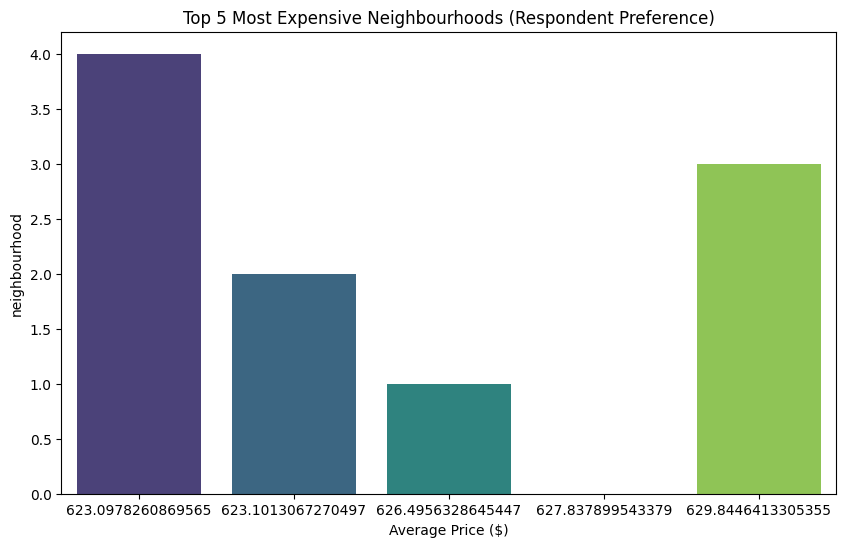

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5_expensive = data.groupby('neighbourhood')['price'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_expensive.values, y=top_5_expensive.index, palette='viridis')
plt.title('Top 5 Most Expensive Neighbourhoods (Respondent Preference)')
plt.xlabel('Average Price ($)')
plt.show()